# Proyecto final. Decision Tree

## Instalación de librerias

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sn

import tkinter as tk
from tkinter import messagebox
import joblib 

## Carga y preprocesamiento de los datos

In [2]:
file_name = "perfil_inversion.csv"
# Carga el conjunto de datos de entrada
dataframe = pd.read_csv(file_name)

# Carga las características o variables predictoras en X (todas las columnas menos la última)
X = dataframe.iloc[:, :-1]
# La variable objetivo 'y' (target) es la última columna
Y = dataframe.iloc[:, -1]
# Obtiene el número de columnas de X
maximo = X.shape[1]

#Preprocesamiento (Transformar valores categóricos a numéricos)
columnas = dataframe.columns[:-1].to_list()
columnas = [col for col in columnas if col != 'registro']
print("Caracteristicas encontradas: ",columnas)
cat_cols = ['tiempo_inversion', 'conocimiento', 'experiencia', 'tolerancia_perdida', 'reaccion_ganancia'] #columnas no numericas

# Crear diccionario para guardar los encoders
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    dataframe[col] = le.fit_transform(dataframe[col])
    encoders[col] = le  # Guardas el encoder para usarlo después

Caracteristicas encontradas:  ['edad', 'ingreso', 'dependientes', 'fuentes_ingreso', 'tiempo_inversion', 'conocimiento', 'experiencia', 'tolerancia_perdida', 'reaccion_ganancia']


## Entrenamiento del modelo

In [3]:
X = dataframe[columnas]
#Y = dataframe.iloc[:, -1].values.reshape(-1,1)
Y=dataframe['respuesta']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

#libreria
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',random_state=42)
tree.fit(X,Y)

joblib.dump(tree, 'decision_tree_model.joblib')
#testear el modelo
Y_pred = tree.predict(X_test) 
#Y_pred = classifier.predict(X_test) 

## Testeo y calculo de metricas


Metricas de rendimiento:

Exactitud (Accuracy): 1.0
Precisión (Precision): 1.0
Sensibilidad (Recall): 1.0
Puntuación F1 (F1 Score): 1.0


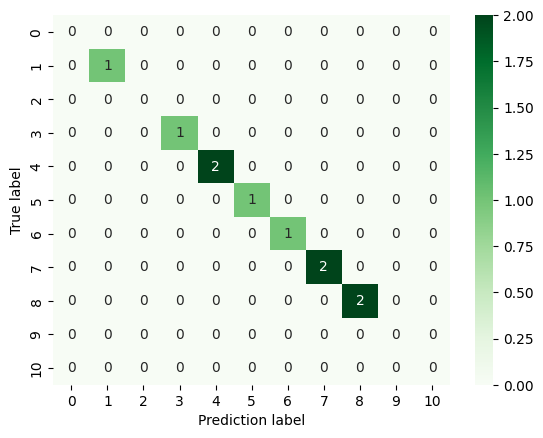

In [4]:

#testear el modelo
Y_pred = tree.predict(X_test) 

# Calcular las métricas ('y' reales vs 'y' predichas)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=0)
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

# Imprimir las métricas
print("\nMetricas de rendimiento:\n")
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Sensibilidad (Recall):", recall)
print("Puntuación F1 (F1 Score):", f1)

# Despliega la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10])
sn.heatmap(cm, cmap="Greens", annot=True)
plt.xlabel("Prediction label")
plt.ylabel("True label")
plt.show()

## Agregar datos 

In [5]:

# resp ='SI'

# while resp.upper()=='SI':
#     resp = input('Desea probar el modelo con sus datos? (SI/NO): ')

#     if resp.upper()=='SI':
#         # Pone el modelo en "producción"
#         # Adquirir los datos del usuario
#         print ('\nIndique los datos que se le soliciten')
#         prod_features = []
#         for feat in columnas:
#             if feat in cat_cols: 
#                 valor_texto = input(f'{feat}: ')
#                 value = encoders[feat].transform([valor_texto])[0]
#             else:
#                 value = float(input(feat+': '))
#             prod_features.append(value)
#         # Crear un dataframe con los datos capturados   
#         df_prod = pd.DataFrame([prod_features], columns=columnas)
#         prediccion = tree.predict(df_prod)

#         print('\n Con los Datos originales:',prod_features)
        
#         pr = prediccion[0]
#         print(f"El modelo predice que en la escala del 1 al 10 del riesgo para la inversion, usted es: {pr}")

## Mostrar y guardar árbol de decisión con personalización

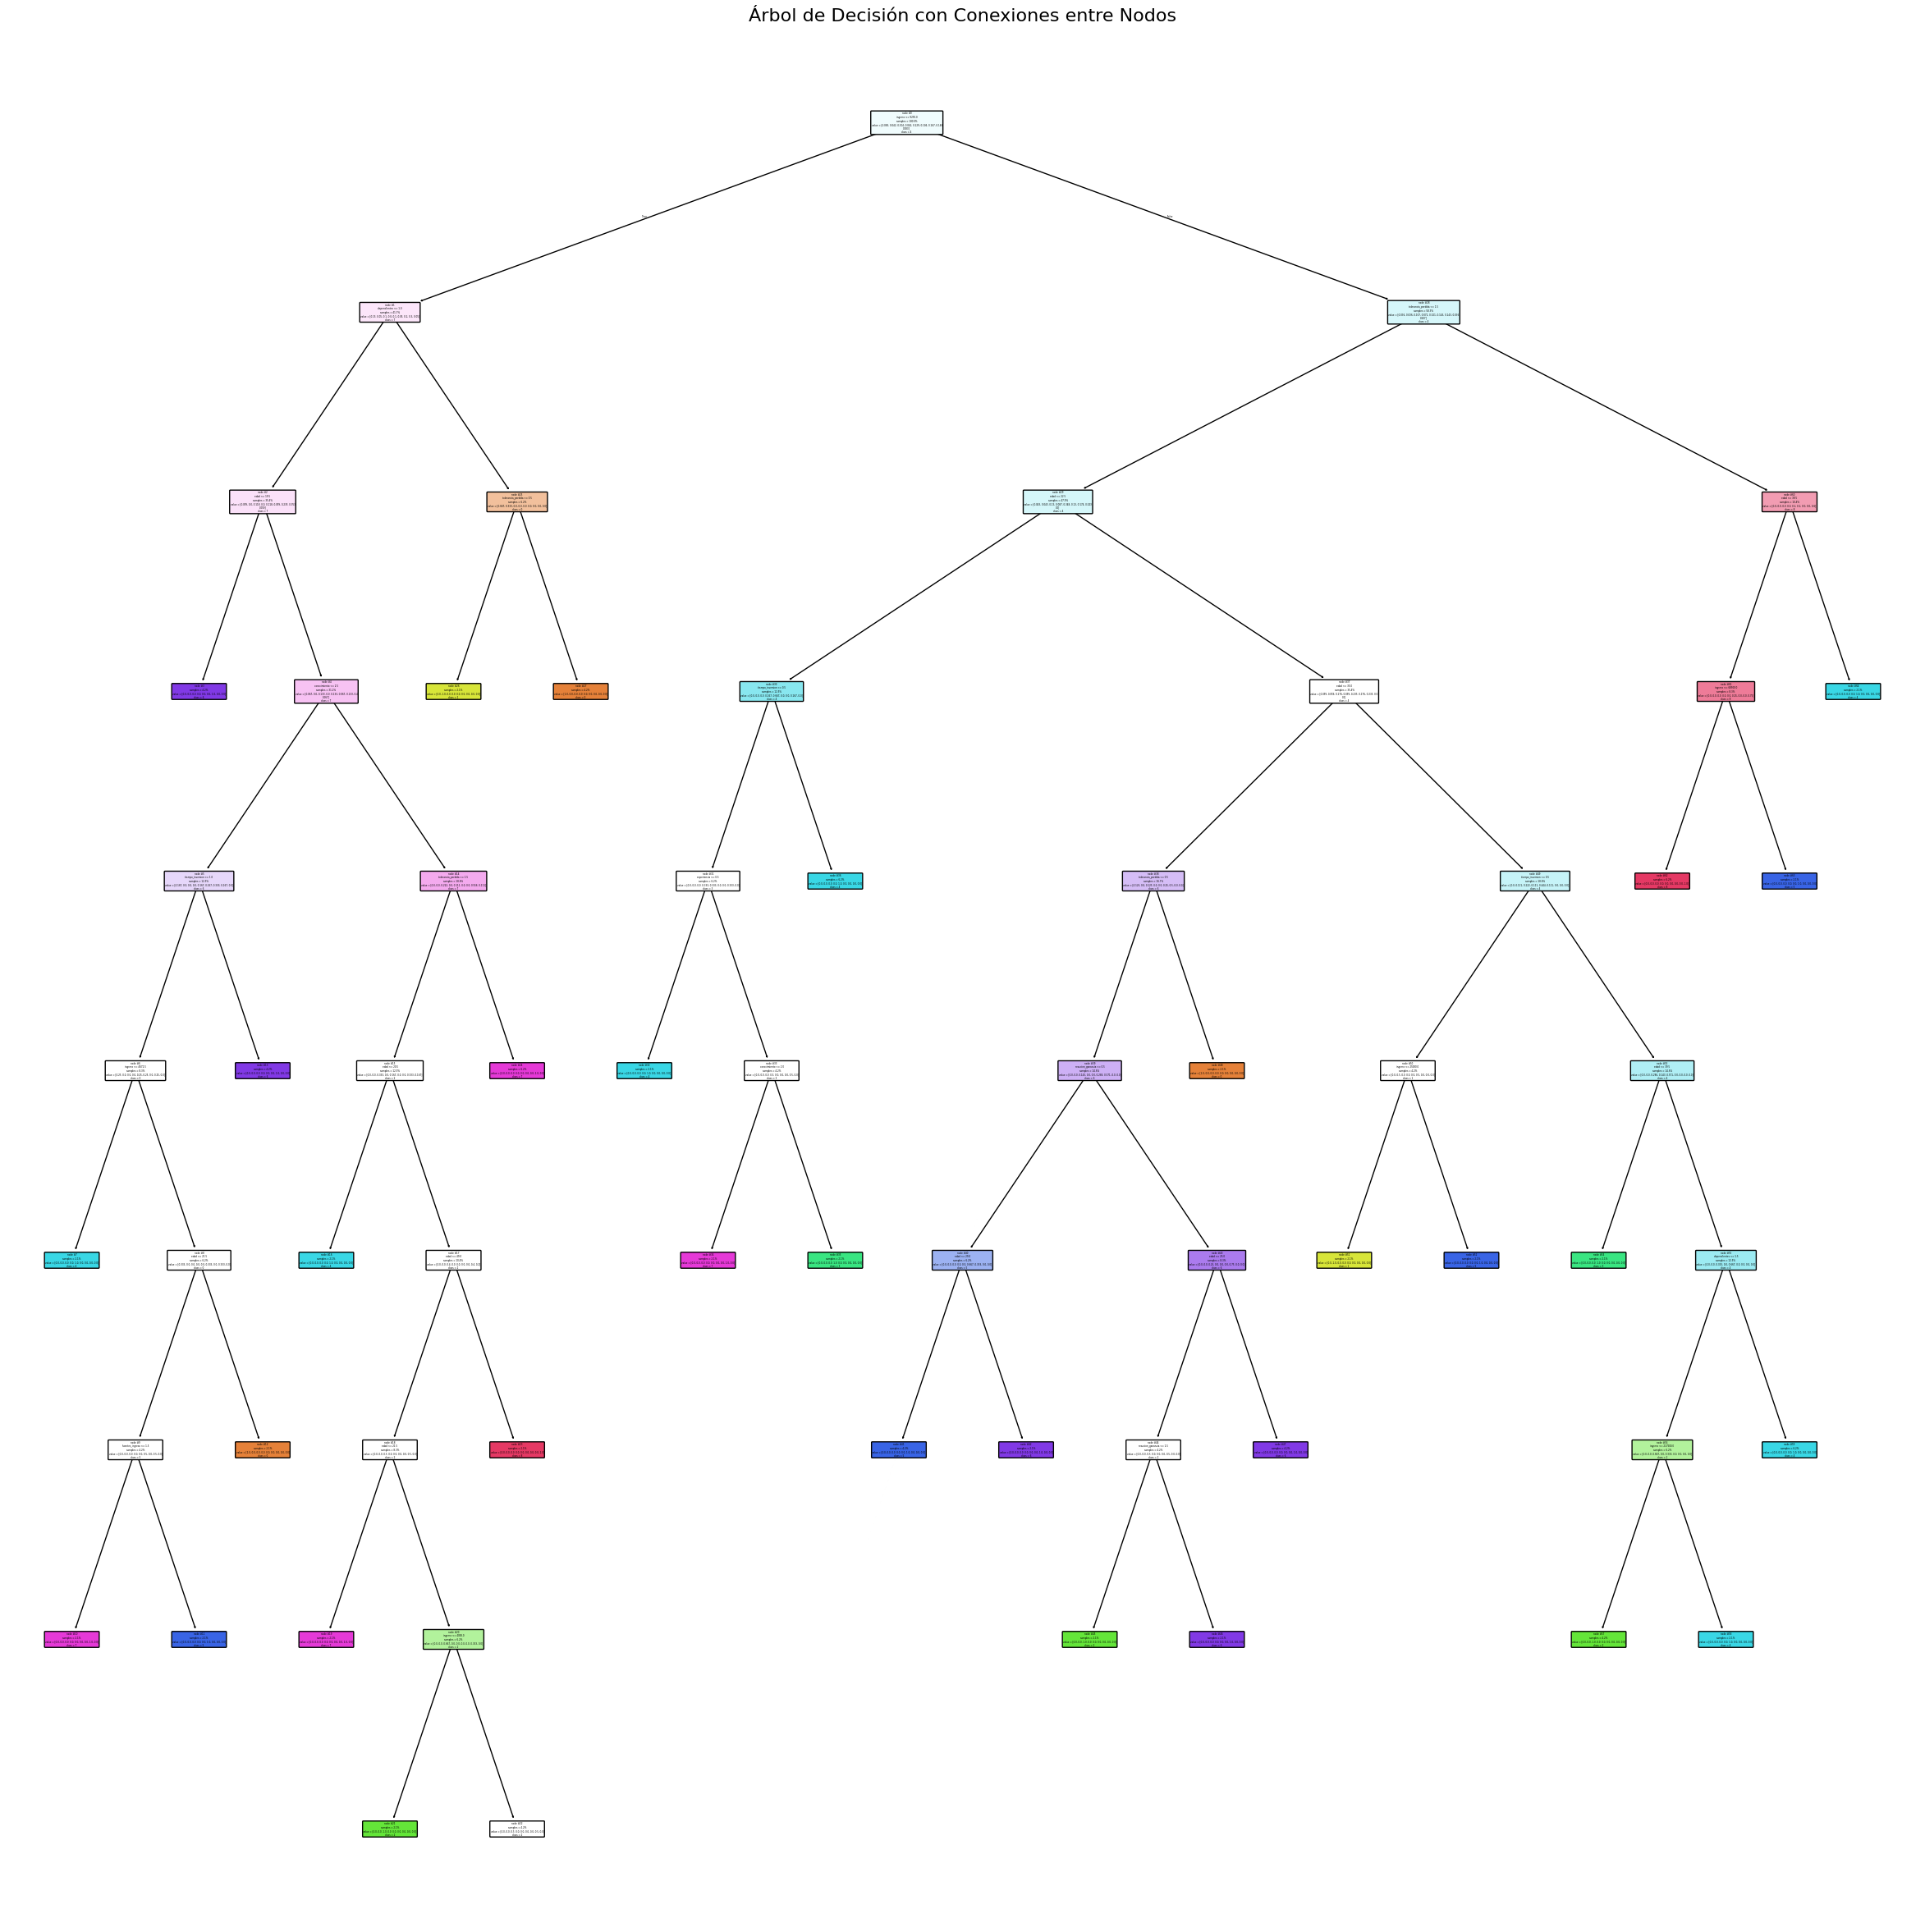

In [6]:
px = 1/plt.rcParams['figure.dpi']  # Pixel in pulgadas

# Ajustes de imagen para árbol de cancer
fig_size = 3000
font_size = 10

plt.figure(figsize=(fig_size*px,fig_size*px))

plot_tree(
    tree,
    feature_names= columnas,
    class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10" ],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    fontsize=2,
    impurity=False
)

plt.title("Árbol de Decisión con Conexiones entre Nodos", fontsize=16)
plt.show()